In [1]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam , RMSprop
import re
import spacy

In [2]:
def tokenizer_txt(text):
    text = re.sub(b'\u200c'.decode("utf-8", "strict"), " ", text)   # replace half-spaces with spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('-', '-', text)
    text = re.sub('[ ]+', ' ', text)
    text = re.sub('\.', ' .', text)
    text = re.sub('\،', ' ،', text)
    text = re.sub('\؛ ', ' ؛', text)
    text = re.sub('\؟ ', ' ؟', text)
    text = re.sub('\"',' ',text)
    text = re.sub('\'','',text)
    text = re.sub('\. \. \.', '...', text)

    unique_words = dict.fromkeys(text.split())
    return ' '.join(unique_words)
  

  



In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x.csv')

In [4]:
train.dropna(inplace  = True)

In [5]:
train['col2'] = train['col2'].apply(lambda x : tokenizer_txt(x))

In [6]:
keys = train['col2'].str.len().sort_values(ascending = False).keys()[:1000]
txt = train[train.index.isin(keys)].reset_index(drop = True)['col2']

In [7]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(txt)
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("سر: ", tokenizer.word_index['دست'])
print("ممد: ", tokenizer.word_index['را'])
print("سر: ", tokenizer.word_index['سر'])
#178055

Total number of words:  15477
Word: ID
------------
<oov>:  1
سر:  52
ممد:  13
سر:  111


In [8]:
input_sequences = []
for line in txt:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))
#4032829
#3663059

Total input sequences:  46330


In [9]:
 di = dict(map(reversed, tokenizer.word_index.items()))

In [10]:
for i,v in enumerate(max(input_sequences , key=len)):
  print(di[v], end=' ')
  if i%20 == 0:
    print('\n')


مقصر 

شخص خود مردمن دست نشانده قورومساقی رو سر کار آوردن که تو استخر فرح سگ مستی و سرخوشی جون داد 

وقتی پدر تفکر یک جریان چنین سبک زندگی داره وای به حال بقیه پنج شش سال با توهم برجام مملکت 

لجن کشیدن رییس جمهور پسر خودش کشت بی سروصدا خاک کرد یقه کدومشون میشه گرفت منتخبین مردم 

In [11]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       1320,   26,  159], dtype=int32)

In [12]:
# create features and label
import tensorflow as tf
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(xs[5])
print(labels[5])
print(ys[5][3325])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 1320   26  159  637  112
    2]
4
0.0


In [3]:
import matplotlib.pyplot as plt


# LSTM

In [23]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
rms = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=32 , epochs=20, verbose=1)
print(model.summary())
print(model)


Epoch 1/20
1448/1448 [==============================] - 27s 16ms/step - loss: 8.9159 - accuracy: 0.0155
Epoch 2/20
1448/1448 [==============================] - 22s 15ms/step - loss: 10.0699 - accuracy: 0.0162
Epoch 3/20
1448/1448 [==============================] - 21s 15ms/step - loss: 10.5805 - accuracy: 0.0203
Epoch 4/20
1448/1448 [==============================] - 21s 15ms/step - loss: 10.5142 - accuracy: 0.0283
Epoch 5/20
1448/1448 [==============================] - 21s 15ms/step - loss: 10.2063 - accuracy: 0.0420
Epoch 6/20
1448/1448 [==============================] - 22s 15ms/step - loss: 9.5852 - accuracy: 0.0574
Epoch 7/20
1448/1448 [==============================] - 21s 15ms/step - loss: 9.1633 - accuracy: 0.0718
Epoch 8/20
1448/1448 [==============================] - 21s 15ms/step - loss: 8.9051 - accuracy: 0.0855
Epoch 9/20
1448/1448 [==============================] - 22s 15ms/step - loss: 8.6334 - accuracy: 0.0946
Epoch 10/20
1448/1448 [==============================] - 21s

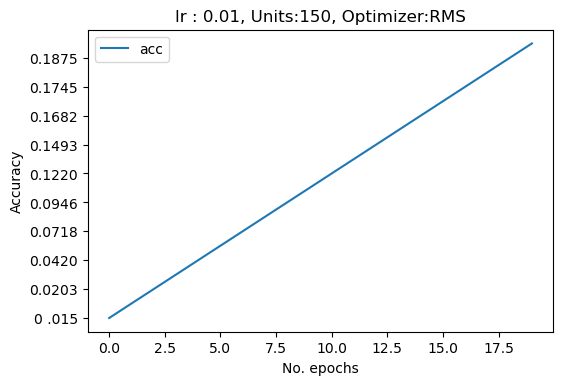

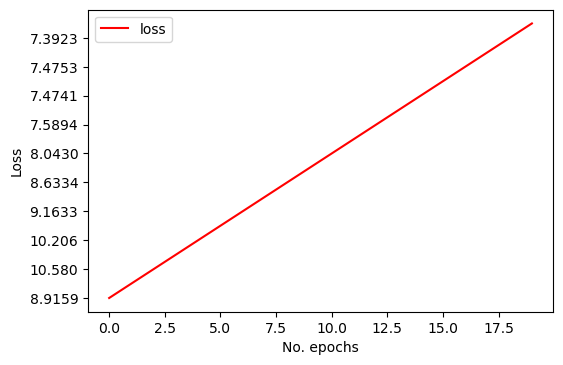

In [46]:
s = """Epoch 1/20
1448/1448 [==============================] - 27s 16ms/step - loss: 8.9159 - accuracy: 0 .0155
Epoch 2/20
1448/1448 [==============================] - 22s 15ms/step - loss: 10.0699 - accuracy: 0.0162
Epoch 3/20
1448/1448 [==============================] - 21s 15ms/step - loss: 10.5805 - accuracy: 0.0203
Epoch 4/20
1448/1448 [==============================] - 21s 15ms/step - loss: 10.5142 - accuracy: 0.0283
Epoch 5/20
1448/1448 [==============================] - 21s 15ms/step - loss: 10.2063 - accuracy: 0.0420
Epoch 6/20
1448/1448 [==============================] - 22s 15ms/step - loss: 9.5852 - accuracy: 0.0574
Epoch 7/20
1448/1448 [==============================] - 21s 15ms/step - loss: 9.1633 - accuracy: 0.0718
Epoch 8/20
1448/1448 [==============================] - 21s 15ms/step - loss: 8.9051 - accuracy: 0.0855
Epoch 9/20
1448/1448 [==============================] - 22s 15ms/step - loss: 8.6334 - accuracy: 0.0946
Epoch 10/20
1448/1448 [==============================] - 21s 15ms/step - loss: 8.3815 - accuracy: 0.1051
Epoch 11/20
1448/1448 [==============================] - 21s 15ms/step - loss: 8.0430 - accuracy: 0.1220
Epoch 12/20
1448/1448 [==============================] - 21s 15ms/step - loss: 7.7969 - accuracy: 0.1374
Epoch 13/20
1448/1448 [==============================] - 21s 14ms/step - loss: 7.5894 - accuracy: 0.1493
Epoch 14/20
1448/1448 [==============================] - 21s 15ms/step - loss: 7.4875 - accuracy: 0.1581
Epoch 15/20
1448/1448 [==============================] - 21s 15ms/step - loss: 7.4741 - accuracy: 0.1682
Epoch 16/20
1448/1448 [==============================] - 22s 15ms/step - loss: 7.5244 - accuracy: 0.1660
Epoch 17/20
1448/1448 [==============================] - 21s 15ms/step - loss: 7.4753 - accuracy: 0.1745
Epoch 18/20
1448/1448 [==============================] - 21s 15ms/step - loss: 7.4108 - accuracy: 0.1845
Epoch 19/20
1448/1448 [==============================] - 21s 14ms/step - loss: 7.3923 - accuracy: 0.1875
Epoch 20/20
1448/1448 [==============================] - 22s 15ms/step - loss: 7.3159 - accuracy: 0.1968
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:150, Optimizer:RMS" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 20, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 20, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [14]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(total_words, activation='softmax'))
rms = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=32 , epochs=30, verbose=1)
print(model.summary())
print(model)


Epoch 1/30
1448/1448 [==============================] - 29s 15ms/step - loss: 9.1757 - accuracy: 0.0136
Epoch 2/30
1448/1448 [==============================] - 25s 17ms/step - loss: 8.4298 - accuracy: 0.0244
Epoch 3/30
1448/1448 [==============================] - 21s 15ms/step - loss: 6.8749 - accuracy: 0.0524
Epoch 4/30
1448/1448 [==============================] - 22s 15ms/step - loss: 4.9833 - accuracy: 0.1674
Epoch 5/30
1448/1448 [==============================] - 22s 15ms/step - loss: 3.6977 - accuracy: 0.3025
Epoch 6/30
1448/1448 [==============================] - 21s 15ms/step - loss: 2.9449 - accuracy: 0.4033
Epoch 7/30
1448/1448 [==============================] - 21s 15ms/step - loss: 2.5118 - accuracy: 0.4693
Epoch 8/30
1448/1448 [==============================] - 21s 15ms/step - loss: 2.2352 - accuracy: 0.5140
Epoch 9/30
1448/1448 [==============================] - 22s 15ms/step - loss: 2.0680 - accuracy: 0.5413
Epoch 10/30
1448/1448 [==============================] - 21s 15m

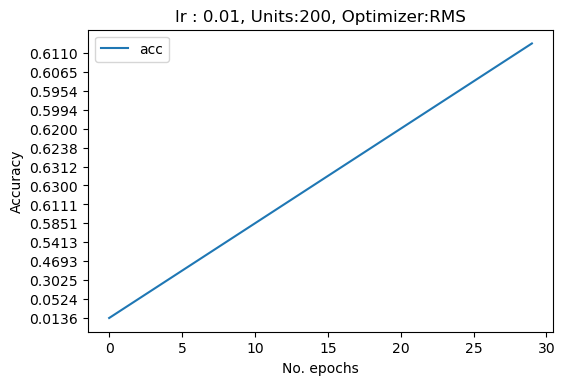

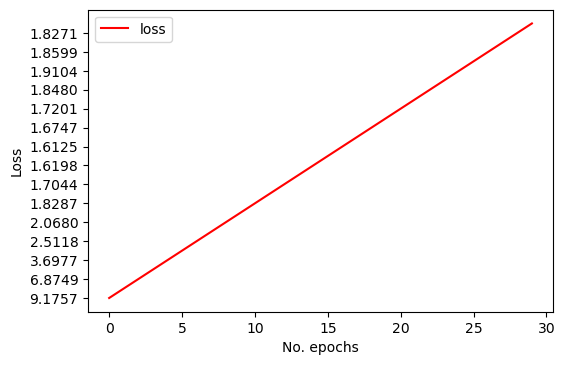

In [97]:
s = """Epoch 1/30
1448/1448 [==============================] - 29s 15ms/step - loss: 9.1757 - accuracy: 0.0136
Epoch 2/30
1448/1448 [==============================] - 25s 17ms/step - loss: 8.4298 - accuracy: 0.0244
Epoch 3/30
1448/1448 [==============================] - 21s 15ms/step - loss: 6.8749 - accuracy: 0.0524
Epoch 4/30
1448/1448 [==============================] - 22s 15ms/step - loss: 4.9833 - accuracy: 0.1674
Epoch 5/30
1448/1448 [==============================] - 22s 15ms/step - loss: 3.6977 - accuracy: 0.3025
Epoch 6/30
1448/1448 [==============================] - 21s 15ms/step - loss: 2.9449 - accuracy: 0.4033
Epoch 7/30
1448/1448 [==============================] - 21s 15ms/step - loss: 2.5118 - accuracy: 0.4693
Epoch 8/30
1448/1448 [==============================] - 21s 15ms/step - loss: 2.2352 - accuracy: 0.5140
Epoch 9/30
1448/1448 [==============================] - 22s 15ms/step - loss: 2.0680 - accuracy: 0.5413
Epoch 10/30
1448/1448 [==============================] - 21s 15ms/step - loss: 1.9479 - accuracy: 0.5659
Epoch 11/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.8287 - accuracy: 0.5851
Epoch 12/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.7589 - accuracy: 0.6013
Epoch 13/30
1448/1448 [==============================] - 21s 15ms/step - loss: 1.7044 - accuracy: 0.6111
Epoch 14/30
1448/1448 [==============================] - 21s 15ms/step - loss: 1.6388 - accuracy: 0.6255
Epoch 15/30
1448/1448 [==============================] - 21s 15ms/step - loss: 1.6198 - accuracy: 0.6300
Epoch 16/30
1448/1448 [==============================] - 23s 16ms/step - loss: 1.5914 - accuracy: 0.6324
Epoch 17/30
1448/1448 [==============================] - 24s 16ms/step - loss: 1.6125 - accuracy: 0.6312
Epoch 18/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.5983 - accuracy: 0.6346
Epoch 19/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.6747 - accuracy: 0.6238
Epoch 20/30
1448/1448 [==============================] - 24s 16ms/step - loss: 1.6829 - accuracy: 0.6234
Epoch 21/30
1448/1448 [==============================] - 22s 16ms/step - loss: 1.7201 - accuracy: 0.6200
Epoch 22/30
1448/1448 [==============================] - 23s 16ms/step - loss: 1.9231 - accuracy: 0.5865
Epoch 23/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.8480 - accuracy: 0.5994
Epoch 24/30
1448/1448 [==============================] - 21s 15ms/step - loss: 1.7438 - accuracy: 0.6160
Epoch 25/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.9104 - accuracy: 0.5954
Epoch 26/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.8662 - accuracy: 0.6011
Epoch 27/30
1448/1448 [==============================] - 23s 16ms/step - loss: 1.8599 - accuracy: 0.6065
Epoch 28/30
1448/1448 [==============================] - 25s 17ms/step - loss: 1.7790 - accuracy: 0.6155
Epoch 29/30
1448/1448 [==============================] - 23s 16ms/step - loss: 1.8271 - accuracy: 0.6110
Epoch 30/30
1448/1448 [==============================] - 22s 15ms/step - loss: 1.9783 - accuracy: 0.5918
Model: "sequential"
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:200, Optimizer:RMS" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 30, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 30, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=16 , epochs=20, verbose=1)
print(model.summary())
print(model)


Epoch 1/20
2896/2896 [==============================] - 46s 15ms/step - loss: 9.2832 - accuracy: 0.0141
Epoch 2/20
2896/2896 [==============================] - 42s 14ms/step - loss: 8.6569 - accuracy: 0.0260
Epoch 3/20
2896/2896 [==============================] - 42s 15ms/step - loss: 7.2463 - accuracy: 0.0439
Epoch 4/20
2896/2896 [==============================] - 43s 15ms/step - loss: 5.7129 - accuracy: 0.1092
Epoch 5/20
2896/2896 [==============================] - 42s 15ms/step - loss: 4.8093 - accuracy: 0.1788
Epoch 6/20
2896/2896 [==============================] - 42s 15ms/step - loss: 4.3437 - accuracy: 0.2191
Epoch 7/20
2896/2896 [==============================] - 42s 15ms/step - loss: 4.0530 - accuracy: 0.2517
Epoch 8/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.8241 - accuracy: 0.2783
Epoch 9/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.6871 - accuracy: 0.2965
Epoch 10/20
2896/2896 [==============================] - 42s 14m

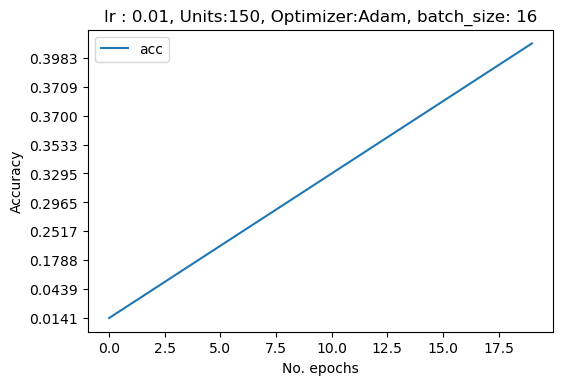

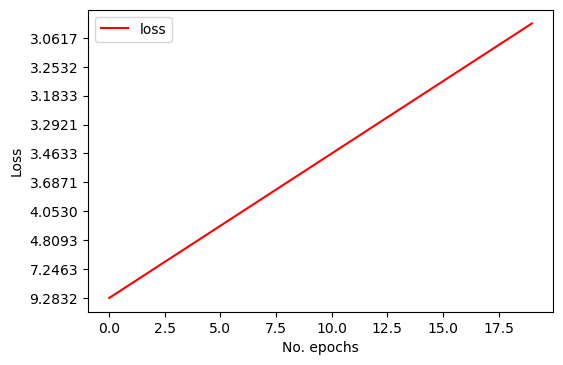

In [99]:
s = """Epoch 1/20
2896/2896 [==============================] - 46s 15ms/step - loss: 9.2832 - accuracy: 0.0141
Epoch 2/20
2896/2896 [==============================] - 42s 14ms/step - loss: 8.6569 - accuracy: 0.0260
Epoch 3/20
2896/2896 [==============================] - 42s 15ms/step - loss: 7.2463 - accuracy: 0.0439
Epoch 4/20
2896/2896 [==============================] - 43s 15ms/step - loss: 5.7129 - accuracy: 0.1092
Epoch 5/20
2896/2896 [==============================] - 42s 15ms/step - loss: 4.8093 - accuracy: 0.1788
Epoch 6/20
2896/2896 [==============================] - 42s 15ms/step - loss: 4.3437 - accuracy: 0.2191
Epoch 7/20
2896/2896 [==============================] - 42s 15ms/step - loss: 4.0530 - accuracy: 0.2517
Epoch 8/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.8241 - accuracy: 0.2783
Epoch 9/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.6871 - accuracy: 0.2965
Epoch 10/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.5670 - accuracy: 0.3143
Epoch 11/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.4633 - accuracy: 0.3295
Epoch 12/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.3467 - accuracy: 0.3434
Epoch 13/20
2896/2896 [==============================] - 42s 15ms/step - loss: 3.2921 - accuracy: 0.3533
Epoch 14/20
2896/2896 [==============================] - 42s 15ms/step - loss: 3.2358 - accuracy: 0.3636
Epoch 15/20
2896/2896 [==============================] - 42s 15ms/step - loss: 3.1833 - accuracy: 0.3700
Epoch 16/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.2602 - accuracy: 0.3722
Epoch 17/20
2896/2896 [==============================] - 40s 14ms/step - loss: 3.2532 - accuracy: 0.3709
Epoch 18/20
2896/2896 [==============================] - 35s 12ms/step - loss: 3.1260 - accuracy: 0.3877
Epoch 19/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.0617 - accuracy: 0.3983
Epoch 20/20
2896/2896 [==============================] - 42s 14ms/step - loss: 3.0210 - accuracy: 0.4062
Model: "sequential_1"
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:150, Optimizer:Adam, batch_size: 16" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 20, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 20, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=32 , epochs=20, verbose=1)
print(model.summary())
print(model)


Epoch 1/20
1448/1448 [==============================] - 30s 16ms/step - loss: 9.0239 - accuracy: 0.0153
Epoch 2/20
1448/1448 [==============================] - 21s 14ms/step - loss: 8.2208 - accuracy: 0.0285
Epoch 3/20
1448/1448 [==============================] - 22s 15ms/step - loss: 6.8831 - accuracy: 0.0565
Epoch 4/20
1448/1448 [==============================] - 27s 18ms/step - loss: 5.1881 - accuracy: 0.1468
Epoch 5/20
1448/1448 [==============================] - 21s 15ms/step - loss: 3.9472 - accuracy: 0.2744
Epoch 6/20
1448/1448 [==============================] - 21s 15ms/step - loss: 3.2117 - accuracy: 0.3691
Epoch 7/20
1448/1448 [==============================] - 21s 14ms/step - loss: 2.7548 - accuracy: 0.4330
Epoch 8/20
1448/1448 [==============================] - 21s 15ms/step - loss: 2.4526 - accuracy: 0.4828
Epoch 9/20
1448/1448 [==============================] - 21s 15ms/step - loss: 2.2659 - accuracy: 0.5115
Epoch 10/20
1448/1448 [==============================] - 21s 15m

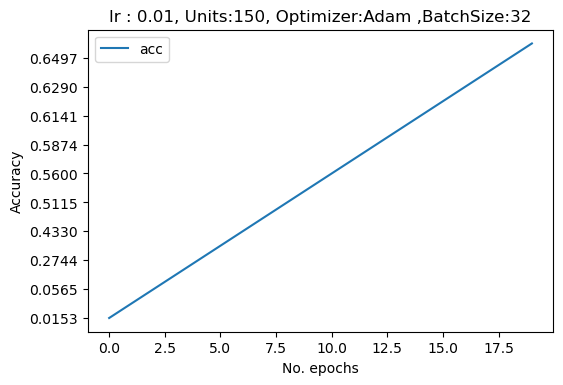

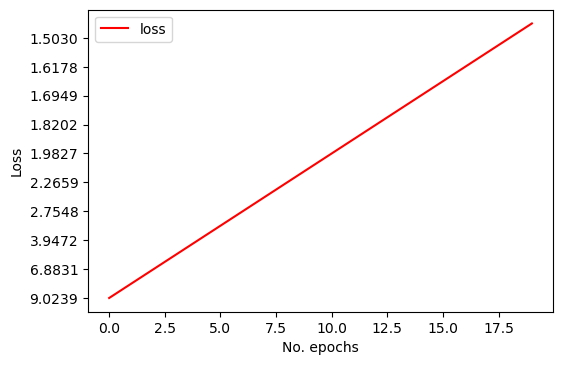

In [60]:
s = """Epoch 1/20
1448/1448 [==============================] - 30s 16ms/step - loss: 9.0239 - accuracy: 0.0153
Epoch 2/20
1448/1448 [==============================] - 21s 14ms/step - loss: 8.2208 - accuracy: 0.0285
Epoch 3/20
1448/1448 [==============================] - 22s 15ms/step - loss: 6.8831 - accuracy: 0.0565
Epoch 4/20
1448/1448 [==============================] - 27s 18ms/step - loss: 5.1881 - accuracy: 0.1468
Epoch 5/20
1448/1448 [==============================] - 21s 15ms/step - loss: 3.9472 - accuracy: 0.2744
Epoch 6/20
1448/1448 [==============================] - 21s 15ms/step - loss: 3.2117 - accuracy: 0.3691
Epoch 7/20
1448/1448 [==============================] - 21s 14ms/step - loss: 2.7548 - accuracy: 0.4330
Epoch 8/20
1448/1448 [==============================] - 21s 15ms/step - loss: 2.4526 - accuracy: 0.4828
Epoch 9/20
1448/1448 [==============================] - 21s 15ms/step - loss: 2.2659 - accuracy: 0.5115
Epoch 10/20
1448/1448 [==============================] - 21s 15ms/step - loss: 2.1007 - accuracy: 0.5405
Epoch 11/20
1448/1448 [==============================] - 21s 15ms/step - loss: 1.9827 - accuracy: 0.5600
Epoch 12/20
1448/1448 [==============================] - 21s 14ms/step - loss: 1.9086 - accuracy: 0.5747
Epoch 13/20
1448/1448 [==============================] - 21s 15ms/step - loss: 1.8202 - accuracy: 0.5874
Epoch 14/20
1448/1448 [==============================] - 21s 15ms/step - loss: 1.7224 - accuracy: 0.6053
Epoch 15/20
1448/1448 [==============================] - 21s 14ms/step - loss: 1.6949 - accuracy: 0.6141
Epoch 16/20
1448/1448 [==============================] - 21s 15ms/step - loss: 1.6914 - accuracy: 0.6133
Epoch 17/20
1448/1448 [==============================] - 21s 15ms/step - loss: 1.6178 - accuracy: 0.6290
Epoch 18/20
1448/1448 [==============================] - 21s 15ms/step - loss: 1.5549 - accuracy: 0.6385
Epoch 19/20
1448/1448 [==============================] - 21s 14ms/step - loss: 1.5030 - accuracy: 0.6497
Epoch 20/20
1448/1448 [==============================] - 21s 14ms/step - loss: 1.5018 - accuracy: 0.6500
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:150, Optimizer:Adam ,BatchSize:32" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 20, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 20, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [32]:
#model.predict('سلام')


model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=20, verbose=1)
print(model.summary())
print(model)

array(['سلام'], dtype='<U4')

Epoch 1/20
362/362 [==============================] - 17s 33ms/step - loss: 8.9133 - accuracy: 0.0145
Epoch 2/20
362/362 [==============================] - 11s 32ms/step - loss: 8.1783 - accuracy: 0.0215
Epoch 3/20
362/362 [==============================] - 10s 28ms/step - loss: 6.9790 - accuracy: 0.0447
Epoch 4/20
362/362 [==============================] - 8s 23ms/step - loss: 5.0393 - accuracy: 0.1586
Epoch 5/20
362/362 [==============================] - 8s 23ms/step - loss: 3.1857 - accuracy: 0.3944
Epoch 6/20
362/362 [==============================] - 8s 23ms/step - loss: 2.0359 - accuracy: 0.5837
Epoch 7/20
362/362 [==============================] - 8s 23ms/step - loss: 1.3254 - accuracy: 0.7158
Epoch 8/20
362/362 [==============================] - 8s 23ms/step - loss: 0.9122 - accuracy: 0.7975
Epoch 9/20
362/362 [==============================] - 8s 23ms/step - loss: 0.6599 - accuracy: 0.8503
Epoch 10/20
362/362 [==============================] - 8s 23ms/step - loss: 0.5247 - acc

array(['سلام'], dtype='<U4')

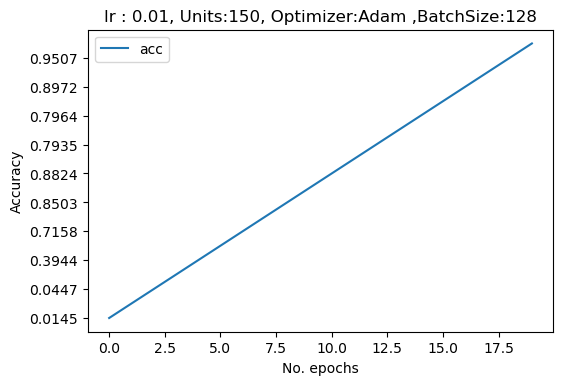

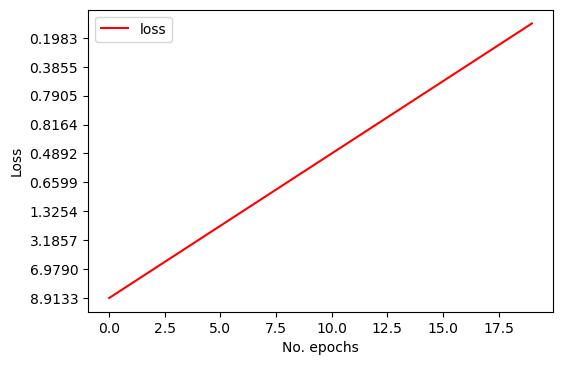

In [64]:
s = """
array(['سلام'], dtype='<U4')
Epoch 1/20
362/362 [==============================] - 17s 33ms/step - loss: 8.9133 - accuracy: 0.0145
Epoch 2/20
362/362 [==============================] - 11s 32ms/step - loss: 8.1783 - accuracy: 0.0215
Epoch 3/20
362/362 [==============================] - 10s 28ms/step - loss: 6.9790 - accuracy: 0.0447
Epoch 4/20
362/362 [==============================] - 8s 23ms/step - loss: 5.0393 - accuracy: 0.1586
Epoch 5/20
362/362 [==============================] - 8s 23ms/step - loss: 3.1857 - accuracy: 0.3944
Epoch 6/20
362/362 [==============================] - 8s 23ms/step - loss: 2.0359 - accuracy: 0.5837
Epoch 7/20
362/362 [==============================] - 8s 23ms/step - loss: 1.3254 - accuracy: 0.7158
Epoch 8/20
362/362 [==============================] - 8s 23ms/step - loss: 0.9122 - accuracy: 0.7975
Epoch 9/20
362/362 [==============================] - 8s 23ms/step - loss: 0.6599 - accuracy: 0.8503
Epoch 10/20
362/362 [==============================] - 8s 23ms/step - loss: 0.5247 - accuracy: 0.8797
Epoch 11/20
362/362 [==============================] - 8s 23ms/step - loss: 0.4892 - accuracy: 0.8824
Epoch 12/20
362/362 [==============================] - 8s 23ms/step - loss: 0.5774 - accuracy: 0.8570
Epoch 13/20
362/362 [==============================] - 8s 23ms/step - loss: 0.8164 - accuracy: 0.7935
Epoch 14/20
362/362 [==============================] - 9s 24ms/step - loss: 0.9781 - accuracy: 0.7521
Epoch 15/20
362/362 [==============================] - 8s 23ms/step - loss: 0.7905 - accuracy: 0.7964
Epoch 16/20
362/362 [==============================] - 9s 24ms/step - loss: 0.5567 - accuracy: 0.8548
Epoch 17/20
362/362 [==============================] - 8s 23ms/step - loss: 0.3855 - accuracy: 0.8972
Epoch 18/20
362/362 [==============================] - 8s 23ms/step - loss: 0.2614 - accuracy: 0.9335
Epoch 19/20
362/362 [==============================] - 8s 23ms/step - loss: 0.1983 - accuracy: 0.9507
Epoch 20/20
362/362 [==============================] - 8s 23ms/step - loss: 0.1884 - accuracy: 0.9537
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:150, Optimizer:Adam ,BatchSize:128" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 20, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 20, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [67]:
seed_text = "انتخابات"
next_words = 16
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

انتخابات به دلیل شدت بودن اینکه شدن از تیم ملی ایران حمله خود مساله نیست که اوضاع


   optimizer  unit_number  batch_size  accuracy  loss
0          1          150          32        65   1.5
1          1          150          16        40   3.0
2          1          150         128        95   0.9
3          0          200          32        60   2.0
4          0          150          32        20   7.3
             optimizer  unit_number  batch_size  accuracy      loss
optimizer     1.000000    -0.612372    0.322749  0.518836 -0.610730
unit_number  -0.612372     1.000000   -0.197642  0.079430 -0.205587
batch_size    0.322749    -0.197642    1.000000  0.784938 -0.425347
accuracy      0.518836     0.079430    0.784938  1.000000 -0.883201
loss         -0.610730    -0.205587   -0.425347 -0.883201  1.000000


<AxesSubplot:>

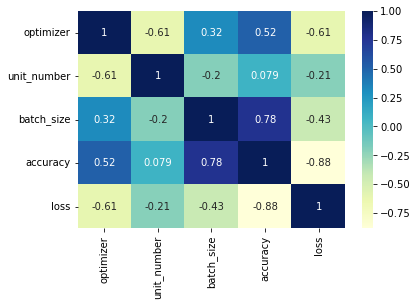

In [92]:
#optimzer 1 as adam and 0 as RMS
import pandas as pd

results = {
    'optimizer': [1, 1, 1, 0, 0],
    'unit_number': [150, 150, 150, 200, 150],
    'batch_size': [32, 16, 128, 32, 32],
    'accuracy': [65, 40, 95, 60, 20],
    'loss': [1.5, 3, 0.9, 2, 7.3]
}

result_data = pd.DataFrame(results)
print(result_data)
print(result_data.corr())
import seaborn as sns
sns.heatmap(result_data.corr(), cmap="YlGnBu", annot=True)

# GRU

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(GRU(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=50, verbose=1)
print(model.summary())
print(model)

Epoch 1/20
362/362 [==============================] - 16s 21ms/step - loss: 8.9419 - accuracy: 0.0146
Epoch 2/20
362/362 [==============================] - 7s 20ms/step - loss: 8.1605 - accuracy: 0.0250
Epoch 3/20
362/362 [==============================] - 8s 22ms/step - loss: 6.9637 - accuracy: 0.0560
Epoch 4/20
362/362 [==============================] - 8s 23ms/step - loss: 5.1243 - accuracy: 0.1467
Epoch 5/20
362/362 [==============================] - 7s 21ms/step - loss: 3.3573 - accuracy: 0.3496
Epoch 6/20
362/362 [==============================] - 8s 21ms/step - loss: 12.4530 - accuracy: 0.1068
Epoch 7/20
362/362 [==============================] - 8s 21ms/step - loss: 16.0528 - accuracy: 0.0174
Epoch 8/20
362/362 [==============================] - 7s 21ms/step - loss: 18.9977 - accuracy: 0.0045
Epoch 9/20
362/362 [==============================] - 7s 21ms/step - loss: 18.1005 - accuracy: 0.0052
Epoch 10/20
362/362 [==============================] - 8s 21ms/step - loss: 14.5232 - 

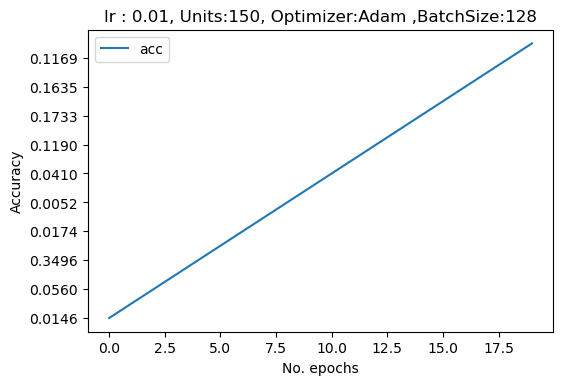

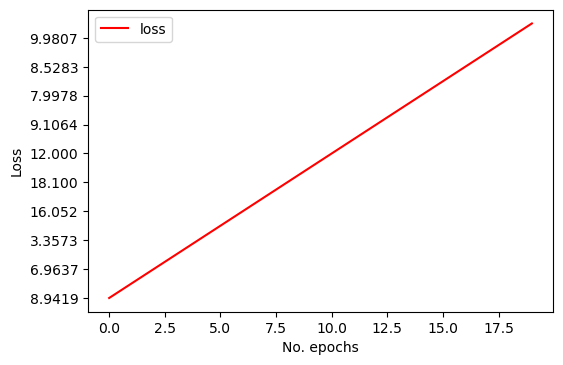

In [74]:
s ="""
Epoch 1/20
362/362 [==============================] - 16s 21ms/step - loss: 8.9419 - accuracy: 0.0146
Epoch 2/20
362/362 [==============================] - 7s 20ms/step - loss: 8.1605 - accuracy: 0.0250
Epoch 3/20
362/362 [==============================] - 8s 22ms/step - loss: 6.9637 - accuracy: 0.0560
Epoch 4/20
362/362 [==============================] - 8s 23ms/step - loss: 5.1243 - accuracy: 0.1467
Epoch 5/20
362/362 [==============================] - 7s 21ms/step - loss: 3.3573 - accuracy: 0.3496
Epoch 6/20
362/362 [==============================] - 8s 21ms/step - loss: 12.4530 - accuracy: 0.1068
Epoch 7/20
362/362 [==============================] - 8s 21ms/step - loss: 16.0528 - accuracy: 0.0174
Epoch 8/20
362/362 [==============================] - 7s 21ms/step - loss: 18.9977 - accuracy: 0.0045
Epoch 9/20
362/362 [==============================] - 7s 21ms/step - loss: 18.1005 - accuracy: 0.0052
Epoch 10/20
362/362 [==============================] - 8s 21ms/step - loss: 14.5232 - accuracy: 0.0152
Epoch 11/20
362/362 [==============================] - 8s 22ms/step - loss: 12.0000 - accuracy: 0.0410
Epoch 12/20
362/362 [==============================] - 8s 21ms/step - loss: 10.1623 - accuracy: 0.0813
Epoch 13/20
362/362 [==============================] - 8s 23ms/step - loss: 9.1064 - accuracy: 0.1190
Epoch 14/20
362/362 [==============================] - 8s 21ms/step - loss: 8.2597 - accuracy: 0.1533
Epoch 15/20
362/362 [==============================] - 7s 21ms/step - loss: 7.9978 - accuracy: 0.1733
Epoch 16/20
362/362 [==============================] - 7s 21ms/step - loss: 8.2239 - accuracy: 0.1666
Epoch 17/20
362/362 [==============================] - 7s 21ms/step - loss: 8.5283 - accuracy: 0.1635
Epoch 18/20
362/362 [==============================] - 8s 21ms/step - loss: 8.8310 - accuracy: 0.1515
Epoch 19/20
362/362 [==============================] - 8s 21ms/step - loss: 9.9807 - accuracy: 0.1169
Epoch 20/20
362/362 [==============================] - 8s 21ms/step - loss: 10.0119 - accuracy: 0.1179
Model: "sequential_1"
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:150, Optimizer:Adam ,BatchSize:128" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 20, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 20, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(GRU(100)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=20, verbose=1)
print(model.summary())
print(model)

Epoch 1/20
362/362 [==============================] - 14s 19ms/step - loss: 8.9027 - accuracy: 0.0148
Epoch 2/20
362/362 [==============================] - 7s 19ms/step - loss: 8.0568 - accuracy: 0.0281
Epoch 3/20
362/362 [==============================] - 7s 19ms/step - loss: 9.4189 - accuracy: 0.0325
Epoch 4/20
362/362 [==============================] - 7s 19ms/step - loss: 9.8711 - accuracy: 0.0155
Epoch 5/20
362/362 [==============================] - 7s 19ms/step - loss: 8.7651 - accuracy: 0.0264
Epoch 6/20
362/362 [==============================] - 7s 19ms/step - loss: 7.9044 - accuracy: 0.0487
Epoch 7/20
362/362 [==============================] - 7s 20ms/step - loss: 6.7308 - accuracy: 0.1066
Epoch 8/20
362/362 [==============================] - 7s 20ms/step - loss: 5.9504 - accuracy: 0.1687
Epoch 9/20
362/362 [==============================] - 7s 19ms/step - loss: 5.3442 - accuracy: 0.2179
Epoch 10/20
362/362 [==============================] - 7s 19ms/step - loss: 4.7897 - accur

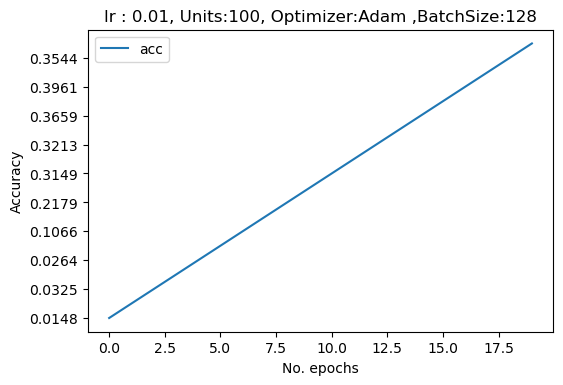

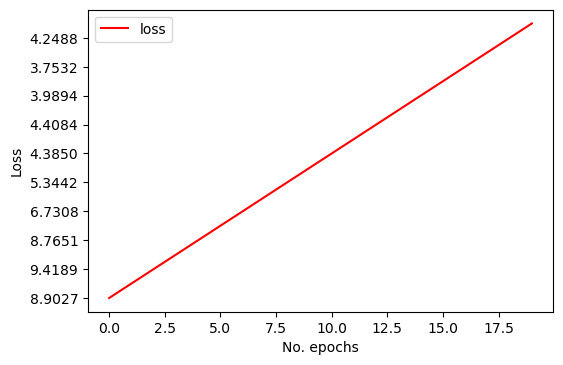

In [75]:
s ="""
Epoch 1/20
362/362 [==============================] - 14s 19ms/step - loss: 8.9027 - accuracy: 0.0148
Epoch 2/20
362/362 [==============================] - 7s 19ms/step - loss: 8.0568 - accuracy: 0.0281
Epoch 3/20
362/362 [==============================] - 7s 19ms/step - loss: 9.4189 - accuracy: 0.0325
Epoch 4/20
362/362 [==============================] - 7s 19ms/step - loss: 9.8711 - accuracy: 0.0155
Epoch 5/20
362/362 [==============================] - 7s 19ms/step - loss: 8.7651 - accuracy: 0.0264
Epoch 6/20
362/362 [==============================] - 7s 19ms/step - loss: 7.9044 - accuracy: 0.0487
Epoch 7/20
362/362 [==============================] - 7s 20ms/step - loss: 6.7308 - accuracy: 0.1066
Epoch 8/20
362/362 [==============================] - 7s 20ms/step - loss: 5.9504 - accuracy: 0.1687
Epoch 9/20
362/362 [==============================] - 7s 19ms/step - loss: 5.3442 - accuracy: 0.2179
Epoch 10/20
362/362 [==============================] - 7s 19ms/step - loss: 4.7897 - accuracy: 0.2719
Epoch 11/20
362/362 [==============================] - 7s 19ms/step - loss: 4.3850 - accuracy: 0.3149
Epoch 12/20
362/362 [==============================] - 7s 19ms/step - loss: 4.3079 - accuracy: 0.3270
Epoch 13/20
362/362 [==============================] - 7s 19ms/step - loss: 4.4084 - accuracy: 0.3213
Epoch 14/20
362/362 [==============================] - 7s 20ms/step - loss: 4.2985 - accuracy: 0.3352
Epoch 15/20
362/362 [==============================] - 7s 19ms/step - loss: 3.9894 - accuracy: 0.3659
Epoch 16/20
362/362 [==============================] - 7s 19ms/step - loss: 3.7495 - accuracy: 0.3958
Epoch 17/20
362/362 [==============================] - 7s 19ms/step - loss: 3.7532 - accuracy: 0.3961
Epoch 18/20
362/362 [==============================] - 7s 19ms/step - loss: 4.0026 - accuracy: 0.3767
Epoch 19/20
362/362 [==============================] - 7s 19ms/step - loss: 4.2488 - accuracy: 0.3544
Epoch 20/20
362/362 [==============================] - 7s 19ms/step - loss: 4.0091 - accuracy: 0.3807
Model: "sequential"
____________________
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:100, Optimizer:Adam ,BatchSize:128" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 20, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 20, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(GRU(50)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=20, verbose=1)
print(model.summary())
print(model)

Epoch 1/20
362/362 [==============================] - 10s 20ms/step - loss: 8.9316 - accuracy: 0.0138
Epoch 2/20
362/362 [==============================] - 7s 19ms/step - loss: 8.1311 - accuracy: 0.0243
Epoch 3/20
362/362 [==============================] - 8s 21ms/step - loss: 6.8141 - accuracy: 0.0529
Epoch 4/20
362/362 [==============================] - 7s 20ms/step - loss: 5.1494 - accuracy: 0.1355
Epoch 5/20
362/362 [==============================] - 7s 19ms/step - loss: 3.7292 - accuracy: 0.2972
Epoch 6/20
362/362 [==============================] - 7s 19ms/step - loss: 2.8209 - accuracy: 0.4390
Epoch 7/20
362/362 [==============================] - 7s 20ms/step - loss: 2.2504 - accuracy: 0.5390
Epoch 8/20
362/362 [==============================] - 7s 19ms/step - loss: 2.4849 - accuracy: 0.5257
Epoch 9/20
362/362 [==============================] - 7s 20ms/step - loss: 4.6481 - accuracy: 0.2014
Epoch 10/20
362/362 [==============================] - 7s 19ms/step - loss: 3.0524 - accur

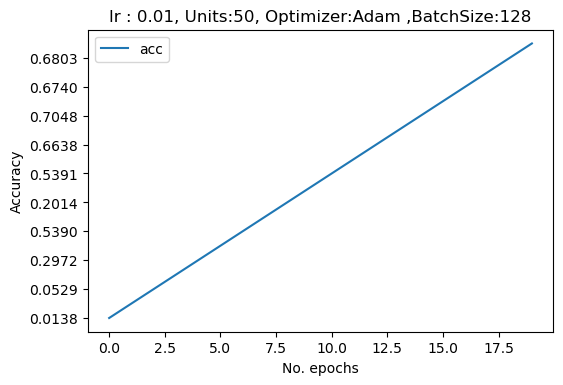

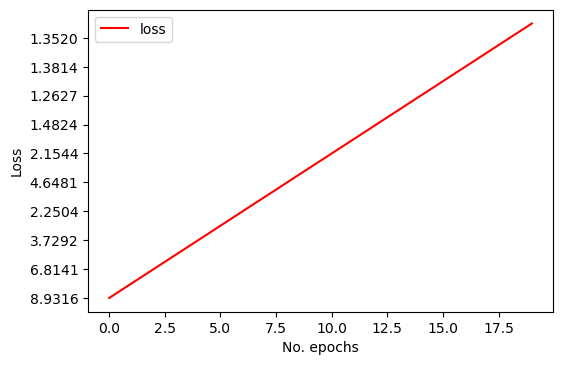

In [76]:
s ="""
Epoch 1/20
362/362 [==============================] - 10s 20ms/step - loss: 8.9316 - accuracy: 0.0138
Epoch 2/20
362/362 [==============================] - 7s 19ms/step - loss: 8.1311 - accuracy: 0.0243
Epoch 3/20
362/362 [==============================] - 8s 21ms/step - loss: 6.8141 - accuracy: 0.0529
Epoch 4/20
362/362 [==============================] - 7s 20ms/step - loss: 5.1494 - accuracy: 0.1355
Epoch 5/20
362/362 [==============================] - 7s 19ms/step - loss: 3.7292 - accuracy: 0.2972
Epoch 6/20
362/362 [==============================] - 7s 19ms/step - loss: 2.8209 - accuracy: 0.4390
Epoch 7/20
362/362 [==============================] - 7s 20ms/step - loss: 2.2504 - accuracy: 0.5390
Epoch 8/20
362/362 [==============================] - 7s 19ms/step - loss: 2.4849 - accuracy: 0.5257
Epoch 9/20
362/362 [==============================] - 7s 20ms/step - loss: 4.6481 - accuracy: 0.2014
Epoch 10/20
362/362 [==============================] - 7s 19ms/step - loss: 3.0524 - accuracy: 0.3944
Epoch 11/20
362/362 [==============================] - 7s 20ms/step - loss: 2.1544 - accuracy: 0.5391
Epoch 12/20
362/362 [==============================] - 7s 20ms/step - loss: 1.7211 - accuracy: 0.6153
Epoch 13/20
362/362 [==============================] - 7s 19ms/step - loss: 1.4824 - accuracy: 0.6638
Epoch 14/20
362/362 [==============================] - 7s 19ms/step - loss: 1.3450 - accuracy: 0.6881
Epoch 15/20
362/362 [==============================] - 7s 19ms/step - loss: 1.2627 - accuracy: 0.7048
Epoch 16/20
362/362 [==============================] - 7s 19ms/step - loss: 1.3010 - accuracy: 0.6965
Epoch 17/20
362/362 [==============================] - 7s 19ms/step - loss: 1.3814 - accuracy: 0.6740
Epoch 18/20
362/362 [==============================] - 7s 20ms/step - loss: 1.4235 - accuracy: 0.6665
Epoch 19/20
362/362 [==============================] - 7s 19ms/step - loss: 1.3520 - accuracy: 0.6803
Epoch 20/20
362/362 [==============================] - 7s 20ms/step - loss: 1.2342 - accuracy: 0.7081
Model: "sequential_1"
"""

acc = [i[:6] for i in s.split('accuracy: ')][1:]
loss = [i[:6] for i in s.split('loss: ')][1:]


plt.figure(dpi=100)

plt.title("lr : 0.01, Units:50, Optimizer:Adam ,BatchSize:128" )

plt.plot(range(len(acc)) , acc, label="acc")


plt.yticks(range(0, 20, 2))

plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
         
plt.figure(dpi=100)
plt.plot(range(len(acc)) , loss, color = 'r' , label="loss")
plt.yticks(range(0, 20, 2))
plt.xlabel('No. epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()
         


In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(GRU(30)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=20, verbose=1)
print(model.summary())
print(model)

Epoch 1/20
362/362 [==============================] - 11s 18ms/step - loss: 9.1322 - accuracy: 0.0141
Epoch 2/20
362/362 [==============================] - 6s 17ms/step - loss: 8.2885 - accuracy: 0.0233
Epoch 3/20
362/362 [==============================] - 6s 17ms/step - loss: 7.2153 - accuracy: 0.0446
Epoch 4/20
362/362 [==============================] - 6s 17ms/step - loss: 5.8397 - accuracy: 0.0956
Epoch 5/20
362/362 [==============================] - 6s 17ms/step - loss: 4.6024 - accuracy: 0.1870
Epoch 6/20
362/362 [==============================] - 6s 17ms/step - loss: 3.6907 - accuracy: 0.3153
Epoch 7/20
362/362 [==============================] - 6s 17ms/step - loss: 3.0862 - accuracy: 0.4106
Epoch 8/20
362/362 [==============================] - 7s 18ms/step - loss: 2.6754 - accuracy: 0.4819
Epoch 9/20
362/362 [==============================] - 6s 17ms/step - loss: 2.3830 - accuracy: 0.5295
Epoch 10/20
362/362 [==============================] - 6s 17ms/step - loss: 2.1649 - accur

In [14]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(GRU(10)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=20, verbose=1)
print(model.summary())
print(model)

Epoch 1/20
362/362 [==============================] - 15s 25ms/step - loss: 9.0417 - accuracy: 0.0146
Epoch 2/20
362/362 [==============================] - 9s 26ms/step - loss: 8.4523 - accuracy: 0.0156
Epoch 3/20
362/362 [==============================] - 7s 21ms/step - loss: 7.9349 - accuracy: 0.0230
Epoch 4/20
362/362 [==============================] - 6s 16ms/step - loss: 7.3578 - accuracy: 0.0334
Epoch 5/20
362/362 [==============================] - 6s 16ms/step - loss: 6.8602 - accuracy: 0.0444
Epoch 6/20
362/362 [==============================] - 6s 16ms/step - loss: 6.4737 - accuracy: 0.0538
Epoch 7/20
362/362 [==============================] - 6s 16ms/step - loss: 6.1642 - accuracy: 0.0605
Epoch 8/20
362/362 [==============================] - 6s 16ms/step - loss: 5.8620 - accuracy: 0.0696
Epoch 9/20
362/362 [==============================] - 6s 16ms/step - loss: 5.6284 - accuracy: 0.0780
Epoch 10/20
362/362 [==============================] - 6s 16ms/step - loss: 5.4371 - accur

In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(GRU(30)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=50, verbose=1)
print(model.summary())
print(model)

Epoch 1/50
362/362 [==============================] - 10s 20ms/step - loss: 8.9417 - accuracy: 0.0138
Epoch 2/50
362/362 [==============================] - 7s 20ms/step - loss: 8.1287 - accuracy: 0.0251
Epoch 3/50
362/362 [==============================] - 7s 20ms/step - loss: 6.9286 - accuracy: 0.0547
Epoch 4/50
362/362 [==============================] - 8s 21ms/step - loss: 5.5773 - accuracy: 0.1154
Epoch 5/50
362/362 [==============================] - 7s 20ms/step - loss: 4.4480 - accuracy: 0.2136
Epoch 6/50
362/362 [==============================] - 7s 20ms/step - loss: 3.6245 - accuracy: 0.3330
Epoch 7/50
362/362 [==============================] - 7s 20ms/step - loss: 3.0798 - accuracy: 0.4201
Epoch 8/50
362/362 [==============================] - 7s 20ms/step - loss: 2.7021 - accuracy: 0.4805
Epoch 9/50
362/362 [==============================] - 8s 21ms/step - loss: 2.4210 - accuracy: 0.5254
Epoch 10/50
362/362 [==============================] - 7s 20ms/step - loss: 2.2134 - accur

In [14]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(30)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, batch_size=128 , epochs=50, verbose=1)
print(model.summary())
print(model)

Epoch 1/50
362/362 [==============================] - 10s 19ms/step - loss: 8.9363 - accuracy: 0.0141
Epoch 2/50
362/362 [==============================] - 7s 19ms/step - loss: 8.2913 - accuracy: 0.0184
Epoch 3/50
362/362 [==============================] - 7s 19ms/step - loss: 7.6623 - accuracy: 0.0261
Epoch 4/50
362/362 [==============================] - 7s 20ms/step - loss: 6.8040 - accuracy: 0.0488
Epoch 5/50
362/362 [==============================] - 7s 19ms/step - loss: 5.8682 - accuracy: 0.0965
Epoch 6/50
362/362 [==============================] - 7s 19ms/step - loss: 4.9895 - accuracy: 0.1783
Epoch 7/50
362/362 [==============================] - 7s 19ms/step - loss: 4.2340 - accuracy: 0.2822
Epoch 8/50
362/362 [==============================] - 7s 19ms/step - loss: 3.6328 - accuracy: 0.3795
Epoch 9/50
362/362 [==============================] - 7s 19ms/step - loss: 3.1664 - accuracy: 0.4513
Epoch 10/50
362/362 [==============================] - 7s 19ms/step - loss: 2.8160 - accur

   unit_number  accuracy  loss
0          150        12  10.0
1          100        38   4.0
2           50        71   1.2
3           10        19   4.0
4           30        77   0.9
             unit_number  accuracy      loss
unit_number     1.000000 -0.462525  0.795705
accuracy       -0.462525  1.000000 -0.854948
loss            0.795705 -0.854948  1.000000


<AxesSubplot:>

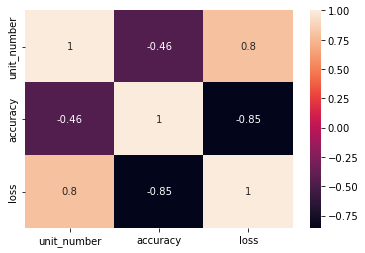

In [100]:
#optimzer 1 as adam and 0 as RMS
#model 1 as LSTM and  0 as GRU
import pandas as pd

results = {
    'unit_number': [150 ,100 ,50 ,10 ,30],
    'accuracy': [12 , 38 , 71 , 19 , 77],
    'loss': [10,4 , 1.2 ,4 ,0.9]
}

result_data = pd.DataFrame(results)
print(result_data)
print(result_data.corr())
import seaborn as sns
sns.heatmap(result_data.corr() , annot=True)